In [1]:
from keras.datasets import mnist

(train_data,train_target),(test_data,test_target)=mnist.load_data()

11501568/11490434 [==============================] - 19s 2us/step


In [2]:
print(train_data.shape , train_target.shape)
print(test_data.shape , test_target.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


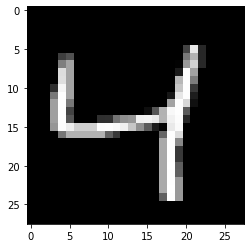

In [7]:
from matplotlib import pyplot as plt

plt.imshow(train_data[2],cmap='gray')
plt.show()

In [8]:
train_target[2]


4

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
__________________________________________________

In [10]:
from keras.utils import np_utils

new_train_target=np_utils.to_categorical(train_target)
new_test_target=np_utils.to_categorical(test_target)

print(train_target[:21])
print(new_train_target[:21])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [11]:
new_train_data=train_data/255
new_test_data=test_data/255

In [12]:
model.fit(new_train_data,new_train_target,epochs=20)


Epoch 1/20
1875/1875 [==============================] - 45s 7ms/step - loss: 0.3795 - accuracy: 0.8775
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0930 - accuracy: 0.9705
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0660 - accuracy: 0.9797
Epoch 4/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0503 - accuracy: 0.9847
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0409 - accuracy: 0.9880
Epoch 6/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0329 - accuracy: 0.9901
Epoch 7/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0296 - accuracy: 0.9904
Epoch 8/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0256 - accuracy: 0.9922
Epoch 9/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0224 - accuracy: 0.9938
Epoch 10/20
1875/1875 [==============================] - 15s 8ms/step - l

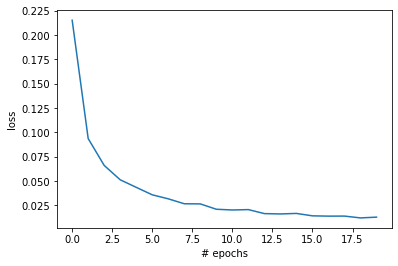

In [14]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

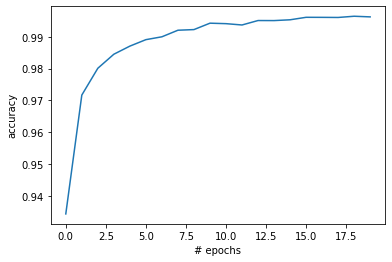

In [16]:
plt.plot(model.history.history['accuracy'])
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.show()

In [17]:
model.evaluate(new_test_data,new_test_target)


313/313 [==============================] - 6s 4ms/step - loss: 0.1134 - accuracy: 0.9821


[0.11336243897676468, 0.9821000099182129]

In [18]:
model.save_weights('FFNN-MNIST.h5')
